In [69]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir("../src/")
from utils.data_prep import data_prep as dp

basepath = "../data/external/"
path_x_train = "../data/external/train_values.csv"
path_y_train = "../data/external/train_labels.csv"
path_x_selected = "../data/interim/"

In [65]:
# List all files in a directory using scandir()
with os.scandir(basepath) as entries:
    for entry in entries:
        if entry.is_file():
            print(entry.name)

submission_format.csv
train_values.csv
test_values.csv
train_labels.csv
.gitkeep


# Explorando os datasets de treino

## y_train

Inicialmente, vamos explorar como é a proporção das classes na resposta/variável de saída:

Text(0.025, 0.975, 'Como é possível\nobservar a base\nnão possui um \ndesbalanceamento\nacentuado.')

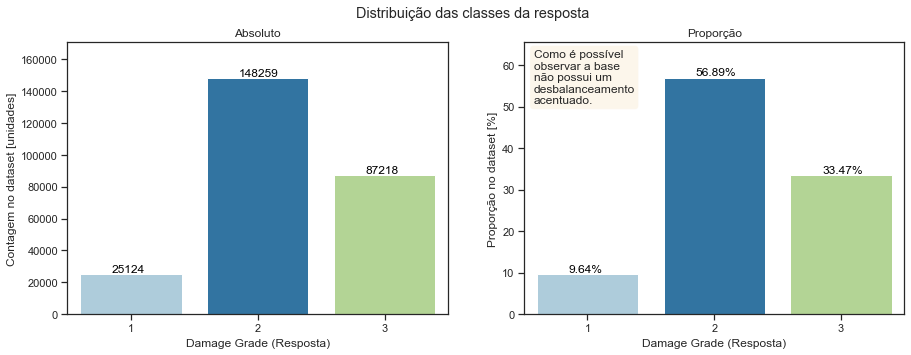

In [67]:
y_train = pd.read_csv(path_y_train, index_col=0)
y_train.head(5)

prop_y = round(100*y_train["damage_grade"].value_counts().sort_index()/y_train["damage_grade"].value_counts().sum(),2)
y = y_train["damage_grade"].value_counts().sort_index()


# ---------------------------
# Gráfico--------------------

f = plt.figure(figsize=(15, 5))
f.suptitle('Distribuição das classes da resposta')
sns.set_palette("Paired")
gs = f.add_gridspec(1, 2);

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[0, 0])
    ax = sns.barplot(x=y.index, y=y.values)
    
    y_max = y.max()*1.15
    ax.set(ylim=(0, y_max))
    ax.set(title="Absoluto", xlabel="Damage Grade (Resposta)", ylabel="Contagem no dataset [unidades]")
    
    for p, label in zip(ax.patches, y.sort_index()):
        ax.annotate(str(label), (p.get_x()+.25, p.get_height()+.1), fontsize=12, color='black', ha='left', va='bottom')

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[0, 1])
    ax = sns.barplot(x=prop_y.index, y=prop_y.values)
    
    y_max = prop_y.max()*1.15
    ax.set(ylim=(0, y_max))
    ax.set(title="Proporção", xlabel="Damage Grade (Resposta)", ylabel="Proporção no dataset [%]")
    
    for p, label in zip(ax.patches, prop_y.sort_index()):
        ax.annotate(str(label)+"%", (p.get_x()+.25, p.get_height()+.1), fontsize=12, color='black', ha='left', va='bottom')
    
textstr = f"""Como é possível
observar a base
não possui um 
desbalanceamento
acentuado."""

props = dict(boxstyle='round', facecolor='wheat', alpha=0.25)

ax.text(0.025, 0.975, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

## X_train

In [68]:
X_train = pd.read_csv(path_x_train, index_col=0)
X_train.head(5)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dp.serieNulos(X_train, 20)

(Series([], dtype: float64),
 '-> 0 atributos/features/campos possuem mais de 20% de valores nulos.')

In [6]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0
has_superstructure_mud_mortar_stone,260601.0,0.761935,0.425900,0.0,1.0,1.0,1.0,1.0
has_superstructure_stone_flag,260601.0,0.034332,0.182081,0.0,0.0,0.0,0.0,1.0


In [7]:
dp.cardinalidade(X_train)

,Atributo,Cardinalidade,Valores
27,has_secondary_use,2,"[0, 1]"
28,has_secondary_use_agriculture,2,"[0, 1]"
35,has_secondary_use_gov_office,2,"[0, 1]"
34,has_secondary_use_health_post,2,"[0, 1]"
29,has_secondary_use_hotel,2,"[0, 1]"
33,has_secondary_use_industry,2,"[0, 1]"
31,has_secondary_use_institution,2,"[0, 1]"
37,has_secondary_use_other,2,"[0, 1]"
30,has_secondary_use_rental,2,"[0, 1]"
32,has_secondary_use_school,2,"[0, 1]"


### Distribuições de X_train

Nas células acima, vimos que:
- X_train possui 38 atributos,
- não há nulos,
- há 22 atributos booleanos,
- há 8 atributos categóricos cujas classes são strings.

Nessa parte analisaremos graficamente os atributos de X_train.Aqui serão considerados atributos categóricos os atributos cujo tipo são strings, booleanos e inteiros com cardinalidade até 10. Os atributos com cardinalidade superior, serão tratados como contínuos, como uma questão de simplificação da análise gráfica.

Aqui plotaremos:
- gráficos de barras para os atributos booleanos, strings e atributos interos com cardinalidade menor que 10,
- histograma para os atributos contínuos.

In [8]:
lst_X_train_booleanas = dp.cardinalidade(X_train).loc[dp.cardinalidade(X_train)["Cardinalidade"]==2,
                                                      "Atributo"].tolist()

lst_X_train_categoricas = dp.cardinalidade(X_train).loc[(dp.cardinalidade(X_train)["Cardinalidade"]<27) &
                                                        (dp.cardinalidade(X_train)["Cardinalidade"]>2),
                                                        "Atributo"].tolist()

lst_X_train_continuas = dp.cardinalidade(X_train).loc[(dp.cardinalidade(X_train)["Cardinalidade"]>=27),
                                                        "Atributo"].tolist()

print(f"""Para os gráficos, dividiremos os atributos de X_train da seguinte forma:
1. lst_X_train_booleanas: {len(lst_X_train_booleanas)}
2. lst_X_train_categoricas: {len(lst_X_train_categoricas)}
3. lst_X_train_continuas: {len(lst_X_train_continuas)}""")

Para os gráficos, dividiremos os atributos de X_train da seguinte forma:
1. lst_X_train_booleanas: 22
2. lst_X_train_categoricas: 10
3. lst_X_train_continuas: 6


### lst_X_train_booleanas

In [13]:
df_atributos_booleanos = pd.concat([X_train[lst_X_train_booleanas], y_train], axis=1)

lst_booleanos = []
for i, feature in enumerate(df_atributos_booleanos.drop("damage_grade", axis=1).columns):
    lst_booleanos.append(100*df_atributos_booleanos[feature].value_counts()/(df_atributos_booleanos[feature].value_counts().sum()))
    
lst_booleanos = pd.DataFrame(lst_booleanos)
lst_booleanos["Remover?"] = np.where((lst_booleanos[0]<1) | (lst_booleanos[1]<1), True, False)
lst_booleanos.sort_values(by=["Remover?", 0], inplace=True)

lst_X_train_booleanas = list(lst_booleanos[lst_booleanos["Remover?"]==False].index)
print(f"""Usaremos como primeira abordagem somente {len(lst_X_train_booleanas)} atributos booleanos,
pois os outros {len(lst_booleanos)-len(lst_X_train_booleanas)} atributos booleanos têm menos de 1% de classe minoritária.""")

lst_booleanos

Usaremos como primeira abordagem somente 14 atributos booleanos,
pois os outros 8 atributos booleanos têm menos de 1% de classe minoritária.


,0,1,Remover?
has_superstructure_mud_mortar_stone,23.806509,76.193491,False
has_superstructure_timber,74.501249,25.498751,False
has_secondary_use,88.812015,11.187985,False
has_superstructure_adobe_mud,91.135491,8.864509,False
has_superstructure_bamboo,91.498881,8.501119,False
has_superstructure_cement_mortar_brick,92.473168,7.526832,False
has_superstructure_mud_mortar_brick,93.184600,6.815400,False
has_secondary_use_agriculture,93.562189,6.437811,False
has_superstructure_rc_non_engineered,95.740999,4.259001,False
has_superstructure_stone_flag,96.566782,3.433218,False


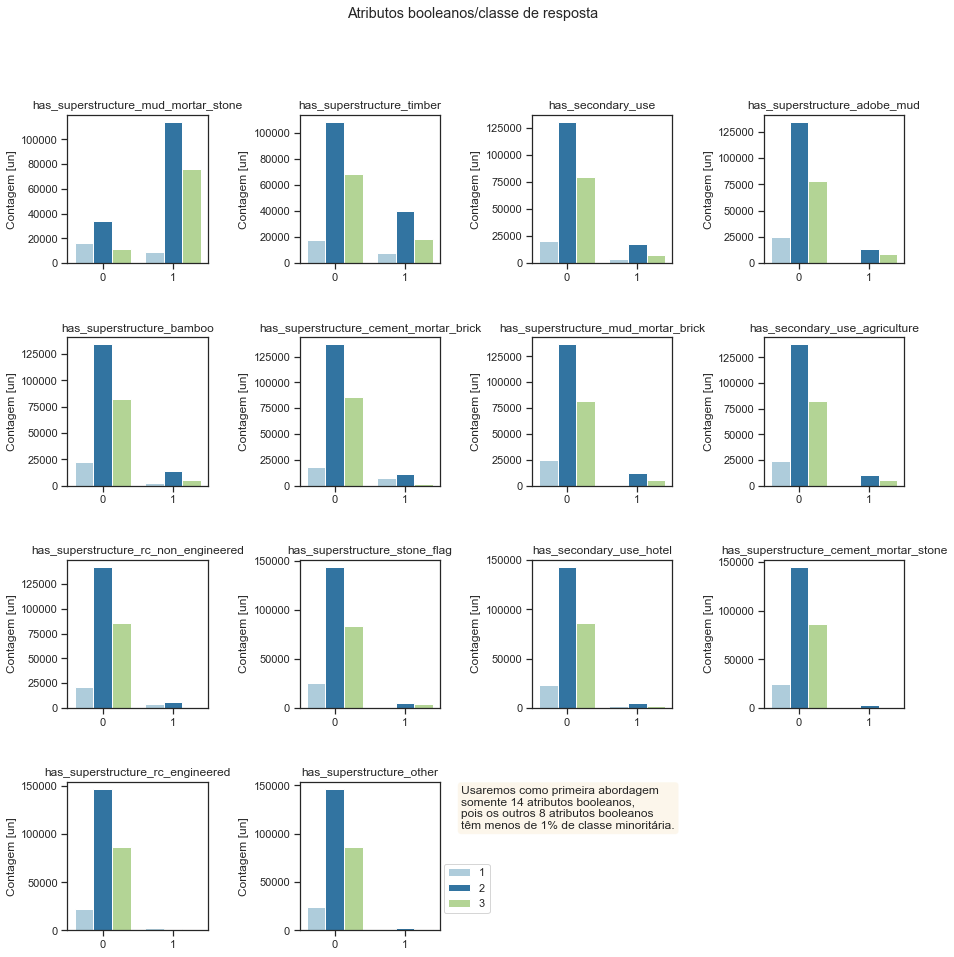

In [50]:
f = plt.figure(figsize=(15, 15))
f.suptitle('Atributos booleanos/classe de resposta')
sns.set_palette("Paired")
# w = h = 1
# widths = [w,w,w,w]
# heights = [h,h,h,h]
gs = f.add_gridspec(nrows=4, ncols=4, wspace=.65, hspace=.5
#                     width_ratios=widths, height_ratios=heights
                   );

row = col = 0
for i, feature in enumerate(lst_X_train_booleanas):
    with sns.axes_style("ticks"):
        ax = f.add_subplot(gs[row, col])
        ax = sns.countplot(x=feature, hue="damage_grade", data=df_atributos_booleanos)
        ax.set(title=feature, xlabel="", ylabel="Contagem [un]")
        ax.get_legend().set_visible(False)
        if (i+1)%4!=0:
            col += 1
        else:
            col = 0
            row+=1

plt.legend(bbox_to_anchor=(1.35, 0.45),borderaxespad=0)

textstr = f"""Usaremos como primeira abordagem
somente {len(lst_X_train_booleanas)} atributos booleanos,
pois os outros {len(lst_booleanos)-len(lst_X_train_booleanas)} atributos booleanos
têm menos de 1% de classe minoritária."""

props = dict(boxstyle='round', facecolor='wheat', alpha=0.25)

ax.text(1.15, 0.975, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props);

### lst_X_train_categoricas

In [16]:
df_atributos_categoricos = pd.concat([X_train[lst_X_train_categoricas], y_train], axis=1)
df_atributos_categoricos.head()

,land_surface_condition,roof_type,legal_ownership_status,other_floor_type,position,foundation_type,ground_floor_type,count_floors_pre_eq,count_families,plan_configuration,damage_grade
building_id,,,,,,,,,,,
802906,t,n,v,q,t,r,f,2,1,d,3
28830,o,n,v,q,s,r,x,2,1,d,2
94947,t,n,v,x,t,r,f,2,1,d,3
590882,t,n,v,x,s,r,f,2,1,d,2
201944,t,n,v,x,s,r,f,3,1,d,3


Ainda sobre as variáveis categóricas, podemos dividí-las em **ordinais** e **nominais**. Vamos separar para não atrapalhar na hora de fazermos o *Target Encoding*.

In [105]:
df_atributos_categoricos_ordinais = df_atributos_categoricos.select_dtypes(include=["int", "int32", "int64"])

df_atributos_categoricos_nominais = df_atributos_categoricos.select_dtypes(exclude=["int", "int32", "int64"])
df_atributos_categoricos_nominais = pd.concat([df_atributos_categoricos_nominais, df_atributos_categoricos["damage_grade"]],
                                              axis=1)

lst_X_train_categoricas_ordinais = list(df_atributos_categoricos_ordinais.columns)[:-1]
lst_X_train_categoricas_nominais = list(df_atributos_categoricos_nominais.columns)[:-1]

#### df_atributos_categoricos_ordinais

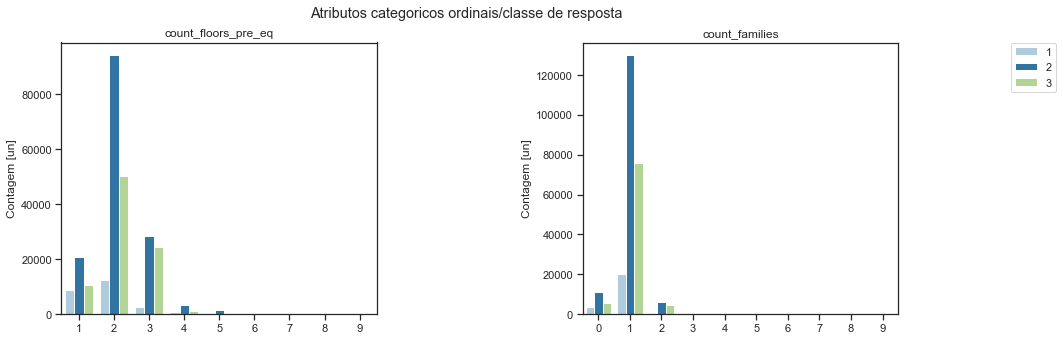

In [106]:
f = plt.figure(figsize=(15, 5))
f.suptitle('Atributos categoricos ordinais/classe de resposta')
sns.set_palette("Paired")
# w = h = 1
# widths = [w,w,w,w]
# heights = [h,h,h,h]
gs = f.add_gridspec(nrows=1, ncols=2, wspace=.65, hspace=.5
#                     width_ratios=widths, height_ratios=heights
                   );

row = col = 0
for i, feature in enumerate(df_atributos_categoricos_ordinais.drop("damage_grade", axis=1).columns):
    with sns.axes_style("ticks"):
        ax = f.add_subplot(gs[row, col])
        ax = sns.countplot(x=feature, hue="damage_grade", data=df_atributos_categoricos_ordinais)
        ax.set(title=feature, xlabel="", ylabel="Contagem [un]")
        ax.get_legend().set_visible(False)
        if (i+1)%3 != 0:
            col += 1
        else:
            col = 0
            row+=1

plt.legend(bbox_to_anchor=(1.5, 1),borderaxespad=0)

#### df_atributos_categoricos_nominais

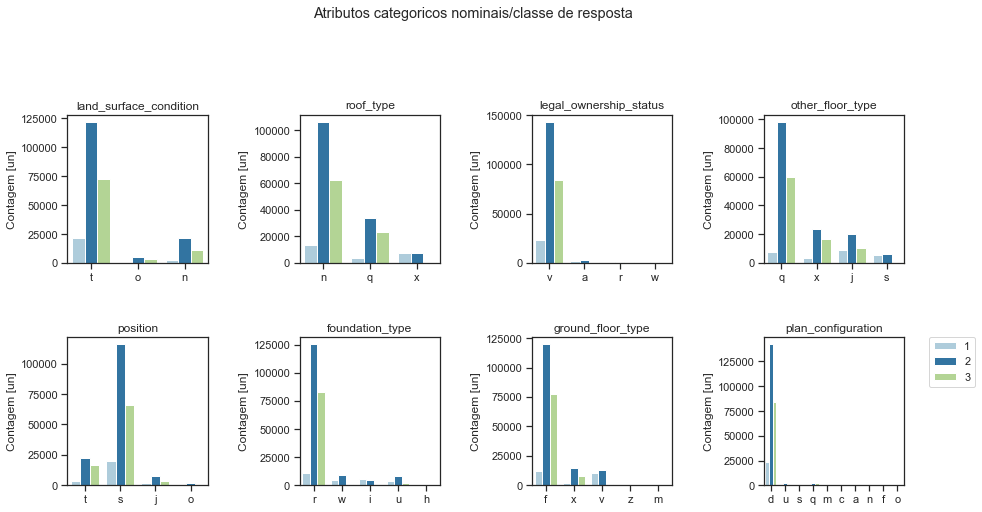

In [107]:
f = plt.figure(figsize=(15, 15))
f.suptitle('Atributos categoricos nominais/classe de resposta')
sns.set_palette("Paired")
# w = h = 1
# widths = [w,w,w,w]
# heights = [h,h,h,h]
gs = f.add_gridspec(nrows=4, ncols=4, wspace=.65, hspace=.5
#                     width_ratios=widths, height_ratios=heights
                   );

row = col = 0
for i, feature in enumerate(df_atributos_categoricos_nominais.drop("damage_grade", axis=1).columns):
    with sns.axes_style("ticks"):
        ax = f.add_subplot(gs[row, col])
        ax = sns.countplot(x=feature, hue="damage_grade", data=df_atributos_categoricos_nominais)
        ax.set(title=feature, xlabel="", ylabel="Contagem [un]")
        ax.get_legend().set_visible(False)
        if (i+1)%4 != 0:
            col += 1
        else:
            col = 0
            row+=1

plt.legend(bbox_to_anchor=(1.5, 1),borderaxespad=0)

### lst_X_train_continuas

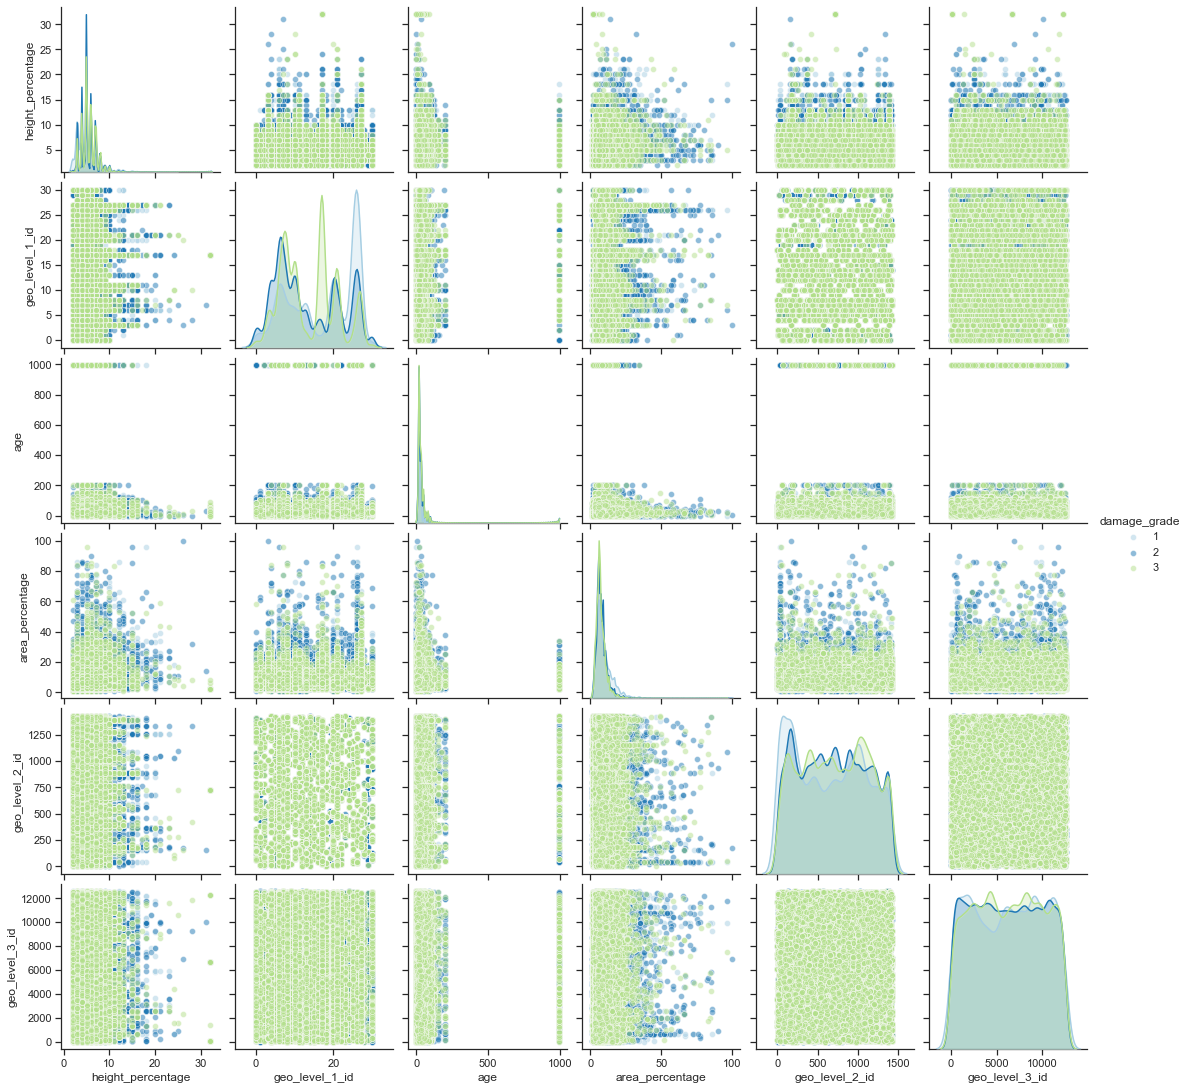

In [108]:
df_atributos_continuos = pd.concat([X_train[lst_X_train_continuas], y_train], axis=1)

sns.set(style="ticks")
sns.set_palette("Paired")

sns.pairplot(df_atributos_continuos, hue="damage_grade", plot_kws={'alpha':0.5})

# Conclusão

Para a próxima etapa, data preparation, levaremos 30 dos 38 atributos iniciais. A variável lst_atributos_data_prep lista esses atributos:

In [109]:
pd.DataFrame(lst_X_train_booleanas).to_csv(path_x_selected+"lst_X_train_booleanas.csv")
pd.DataFrame(lst_X_train_categoricas).to_csv(path_x_selected+"lst_X_train_categoricas.csv")

pd.DataFrame(lst_X_train_categoricas_ordinais).to_csv(path_x_selected+"lst_X_train_categoricas_ordinais.csv")
pd.DataFrame(lst_X_train_categoricas_nominais).to_csv(path_x_selected+"lst_X_train_categoricas_nominais.csv")

pd.DataFrame(lst_X_train_continuas).to_csv(path_x_selected+"lst_X_train_continuas.csv")